**Модель для задачи классификации**

In [1]:
# подключение библиотек
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
# генерируем датасет на 2 класса
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# разделяем его на 2 выборки
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# обучаем модель
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

# Метрики оценки (Evaluation metrics)

## Метрики для задачи классификации

**Статистическая точность**

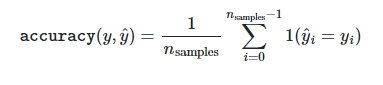

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
# получаем предказания
y_pred = model.predict(testX)
accuracy_score(testy, y_pred)

0.806

**Точность (precision), полнота(recall), f1-score**

Точность (precision) и полнота (recall) являются метриками которые используются при оценке большей части алгоритмов извлечения информации. Иногда они используются сами по себе, иногда в качестве базиса для производных метрик, таких как F-мера. Суть точности и полноты очень проста.

Точность системы в пределах класса – это доля документов действительно принадлежащих данному классу относительно всех документов которые система отнесла к этому классу. Полнота системы – это доля найденных классфикатором документов принадлежащих классу относительно всех документов этого класса в тестовой выборке.

Эти значения легко рассчитать на основании таблицы контингентности, которая составляется для каждого класса отдельно.



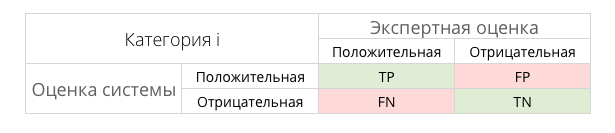

В таблице содержится информация сколько раз система приняла верное и сколько раз неверное решение по документам заданного класса. А именно:

* TP — истино-положительное решение;
* TN — истино-отрицательное решение;
* FP — ложно-положительное решение;
* FN — ложно-отрицательное решение.

Тогда, точность и полнота определяются следующим образом:

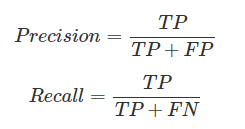

F-мера представляет собой гармоническое среднее между точностью и полнотой. Она стремится к нулю, если точность или полнота стремится к нулю.

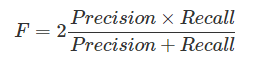

In [3]:
from sklearn import metrics

In [4]:
metrics.precision_score(testy, y_pred)

0.8584474885844748

In [5]:
metrics.recall_score(testy, y_pred)

0.7401574803149606

In [6]:
metrics.f1_score(testy, y_pred)

0.7949260042283298

**ROC/AUC**

ROC-кривая — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак, и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак при варьировании порога решающего правила.

Также известна как кривая ошибок. Анализ классификаций с применением ROC-кривых называется ROC-анализом.

Количественная интерпретация ROC даёт показатель AUC (площадь под кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше.

LogisticRegression: ROC AUC=0.863


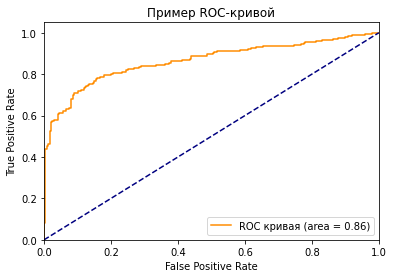

In [7]:
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

**Матрица неточностей** \
Матрица неточностей – это матрица размера N на N, где N — это количество классов. Столбцы этой матрицы резервируются за экспертными решениями, а строки за решениями классификатора. Когда мы классифицируем документ из тестовой выборки мы инкрементируем число стоящее на пересечении строки класса который вернул классификатор и столбца класса к которому действительно относится документ.

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testy, y_pred)

array([[215,  31],
       [ 66, 188]])

**Модель для задачи регрессии**

In [9]:
# подключение библиотек
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
# генерируем датасет на 2 класса
X, y = make_regression(n_samples=100, n_features=100, n_informative=50, random_state=1)
# разделяем его на 2 выборки
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# обучаем модель
model = LinearRegression()
model.fit(trainX, trainy)

LinearRegression()

## Метрики для задачи регрессии

In [10]:
from sklearn.metrics import explained_variance_score

y_pred = model.predict(testX)
explained_variance_score(testy, y_pred)

0.5771902904141369

**Средняя абсолютная ошибка (MAE)**

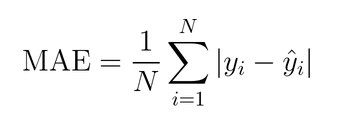

где yᵢ целевой результат и ŷᵢ это прогноз модели.

В MAE ошибка рассчитывается как среднее абсолютных разностей между целевыми ( yᵢ ) значениями и прогнозами ( ŷᵢ ).

In [11]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(testy, y_pred)

239.48711480920178

**Средняя квадратическая ошибка (MSE)**

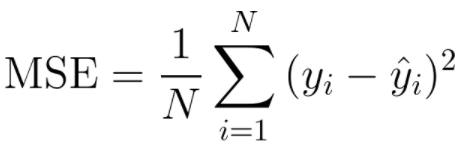

MSE измеряет среднеквадратичную ошибку прогнозов. Для каждой точки вычисляется квадратная разница между прогнозами и целью, а затем эти значения усредняются.

In [12]:
from sklearn.metrics import mean_squared_error

mean_squared_error(testy, y_pred)

98175.66414069086

**R квадрат (R²)**

Коэффициент детерминации (R-квадрат) — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по факторам дисперсии зависимой переменной) в дисперсии зависимой переменной. Его рассматривают как универсальную меру зависимости одной случайной величины от множества других.

R² - это соотношение между тем, насколько хороша наша модель, и тем, насколько хороша модель наивного среднего.


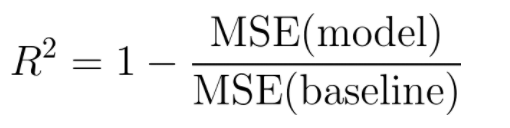

In [13]:
from sklearn.metrics import r2_score

r2_score(testy, y_pred)

0.5731424695889198

RMSE - это просто квадратный корень из MSE. Квадратный корень введен, чтобы масштаб ошибок был таким же, как масштаб целей.

In [ ]:
# RMSE
mean_squared_error(testy, y_pred, squared=False)

313.3299604900413